

# **Diabetes Prediction Using Logistics Regression**

-------------

## **Objective: To develop a logistic regression model to accurately predict the likelihood of diabetes using a dataset of relevant patient features**

---------------------------------

## **Import Library**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Import Data**

In [3]:
diabet = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/Diabetes.csv')

## **Explore Data**

**First 5 Rows**

In [4]:
diabet.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Shape of Dataset**

In [5]:
diabet.shape

(768, 9)

**Information about Dataset**

In [6]:
diabet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   diastolic    768 non-null    int64  
 3   triceps      768 non-null    int64  
 4   insulin      768 non-null    int64  
 5   bmi          768 non-null    float64
 6   dpf          768 non-null    float64
 7   age          768 non-null    int64  
 8   diabetes     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Description of Dataset**

In [7]:
diabet.describe()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Datatypes in Dataset**

In [8]:
diabet.dtypes

pregnancies      int64
glucose          int64
diastolic        int64
triceps          int64
insulin          int64
bmi            float64
dpf            float64
age              int64
diabetes         int64
dtype: object

**Identifying Missing Values**

In [9]:
diabet.isnull()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [10]:
diabet.isnull().sum()

pregnancies    0
glucose        0
diastolic      0
triceps        0
insulin        0
bmi            0
dpf            0
age            0
diabetes       0
dtype: int64

## **Data Preprocessing**

**Outlier Visualization**

<Axes: >

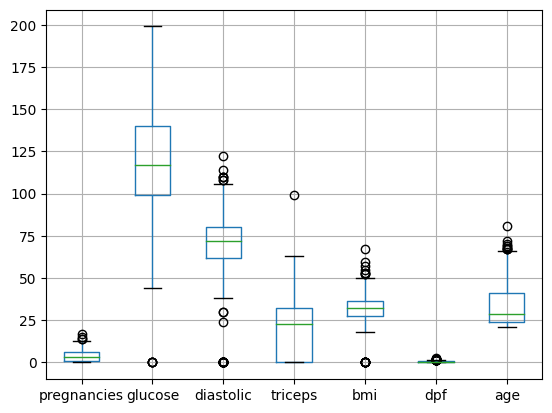

In [11]:
diabet.boxplot(column=['pregnancies','glucose','diastolic','triceps','bmi','dpf','age',])

<Axes: >

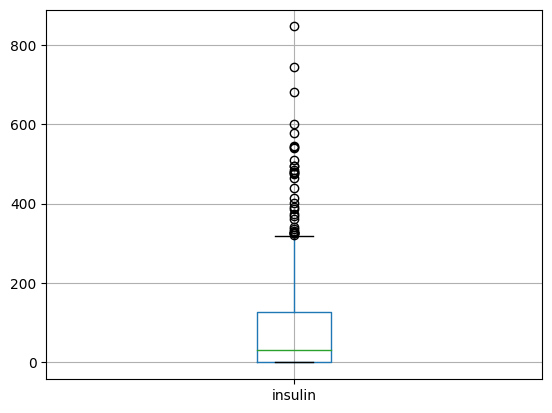

In [12]:
diabet.boxplot(column=['insulin'])

In [13]:
diabet1 = diabet.copy()

**Calculating quantiles for each feature**

In [14]:
Q1 = diabet1.quantile(0.25)
Q3 = diabet1.quantile(0.75)
IQR = Q3 - Q1
IQR

pregnancies      5.0000
glucose         41.2500
diastolic       18.0000
triceps         32.0000
insulin        127.2500
bmi              9.3000
dpf              0.3825
age             17.0000
diabetes         1.0000
dtype: float64

**Identifying outlier using IQR**

In [15]:
out1 = diabet1[((diabet1 < (Q1 - 1.5 * IQR)) | (diabet1 > (Q3 + 1.5 * IQR))).any(axis=1)]
out1.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
4,0,137,40,35,168,43.1,2.288,33,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1
12,10,139,80,0,0,27.1,1.441,57,0


**Removing Outliers**

In [16]:
out = diabet1[~((diabet1 < (Q1 - 1.5 * IQR)) | (diabet1 > (Q3 + 1.5 * IQR))).any(axis=1)]
diabet = out.copy()
diabet.shape

(639, 9)

In [17]:
diabet['diabetes'].value_counts(normalize=True)

diabetes
0    0.687011
1    0.312989
Name: proportion, dtype: float64

<Axes: xlabel='diabetes', ylabel='count'>

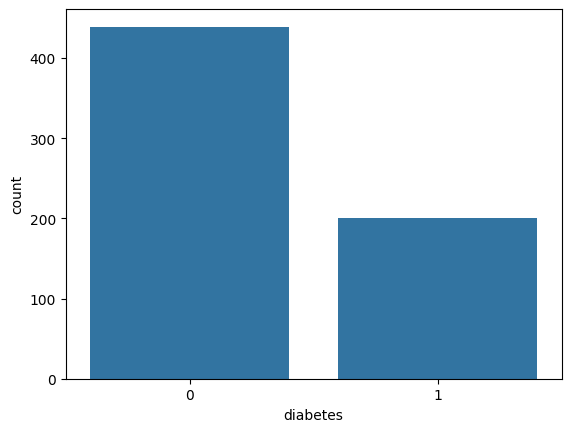

In [18]:
sns.countplot(x='diabetes',data=diabet)

## **Data Visualization**

**Scatter plot to visualize the relationship between each variables**

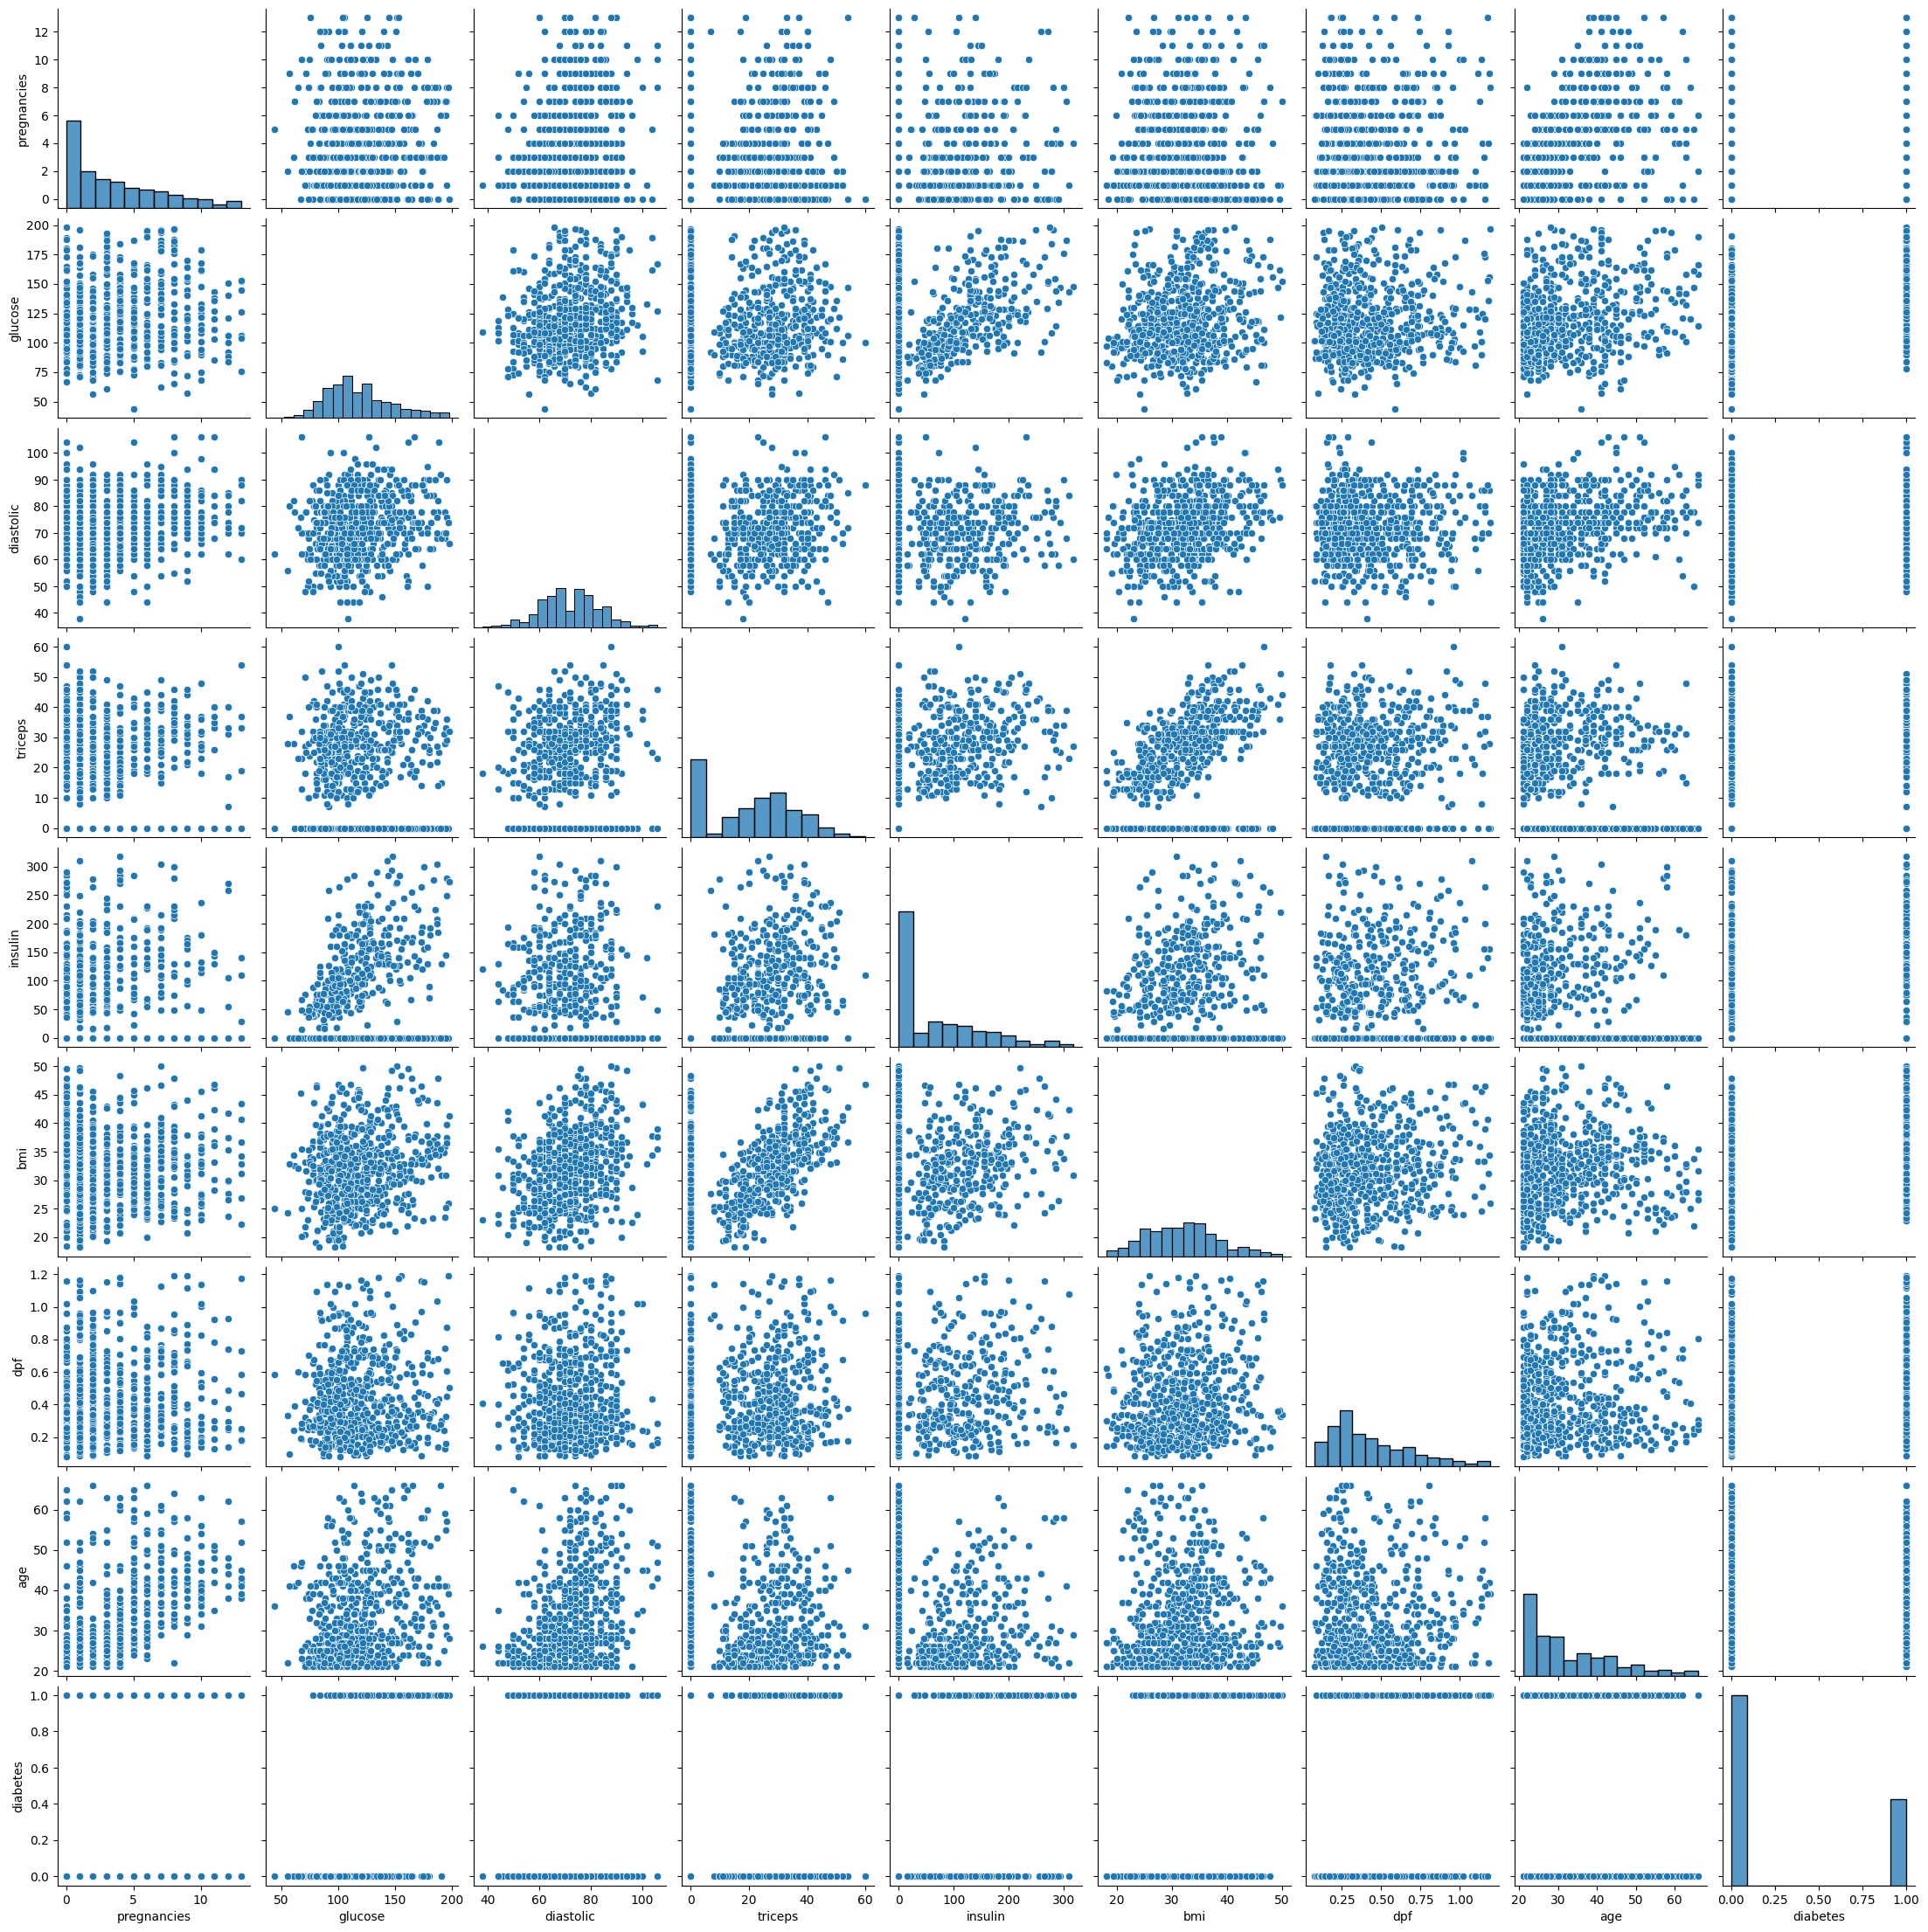

In [19]:
sns.pairplot(diabet)

**Correlation for each variable**

In [20]:
diabet.corr()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
pregnancies,1.000000,0.142093,0.210666,-0.094425,-0.114510,0.036958,0.009289,0.567438,0.227987
glucose,0.142093,1.000000,0.238754,-0.004609,0.248225,0.192504,0.066530,0.286682,0.492740
diastolic,0.210666,0.238754,1.000000,0.037388,-0.041513,0.303301,0.024290,0.354036,0.183298
triceps,-0.094425,-0.004609,0.037388,1.000000,0.487566,0.390340,0.148486,-0.143376,0.030676
insulin,-0.114510,0.248225,-0.041513,0.487566,1.000000,0.188635,0.213191,-0.089535,0.097746
bmi,0.036958,0.192504,0.303301,0.390340,0.188635,1.000000,0.144757,0.063370,0.269371
dpf,0.009289,0.066530,0.024290,0.148486,0.213191,0.144757,1.000000,0.030081,0.179072
age,0.567438,0.286682,0.354036,-0.143376,-0.089535,0.063370,0.030081,1.000000,0.263344
diabetes,0.227987,0.492740,0.183298,0.030676,0.097746,0.269371,0.179072,0.263344,1.000000


**Visualizing the Correlation**

<Axes: >

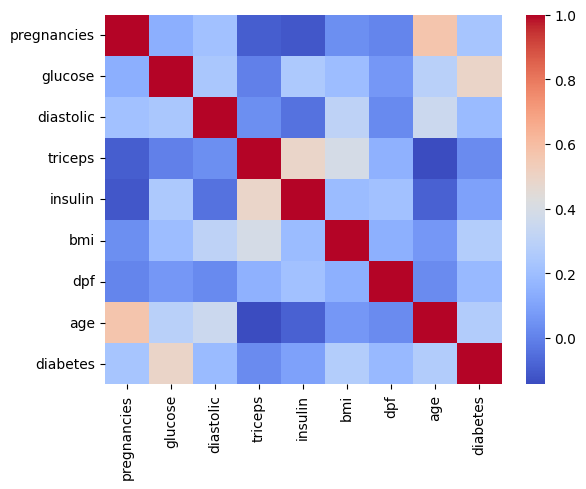

In [21]:
corr_matrix = diabet.corr()
sns.heatmap(corr_matrix, cmap='coolwarm')

## **Define Target Variable (y) and Feature Variables (X)**

In [22]:
diabet.columns

Index(['pregnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi',
       'dpf', 'age', 'diabetes'],
      dtype='object')

In [23]:
diabet.groupby('diabetes').mean()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age
diabetes,,,,,,,,
0,3.302961,109.421412,70.71754,20.246014,60.685649,30.836902,0.398868,30.747153
1,4.905000,140.385000,75.20000,21.260000,77.445000,34.571500,0.495705,37.035000


In [24]:
Y = diabet['diabetes']
X = diabet.drop(['diabetes'],axis=1)

## **Train Test Split**

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=2529)

In [27]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((447, 8), (192, 8), (447,), (192,))



## **Model Train**

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
logreg = LogisticRegression()

In [30]:
logreg.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## **Prediction**

In [31]:
logreg_pred = logreg.predict(X_test)

In [32]:
logreg_pred.shape

(192,)

In [33]:
logreg_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0])

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
accuracy_score(Y_test,logreg_pred)

0.7864583333333334

## **Model Evaluation**

In [49]:
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,roc_auc_score

**Confusion Matrix**

In [37]:
print(confusion_matrix(Y_test,logreg_pred))

[[124  14]
 [ 27  27]]


**Classification Report**

In [38]:
print(classification_report(Y_test,logreg_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       138
           1       0.66      0.50      0.57        54

    accuracy                           0.79       192
   macro avg       0.74      0.70      0.71       192
weighted avg       0.78      0.79      0.78       192



**ROC-AUC Curve**

In [45]:
Y_pred_prob = logreg.predict_proba(X_test)[:,1]
fpr,tpr,thresholds = roc_curve(Y_test,Y_pred_prob)

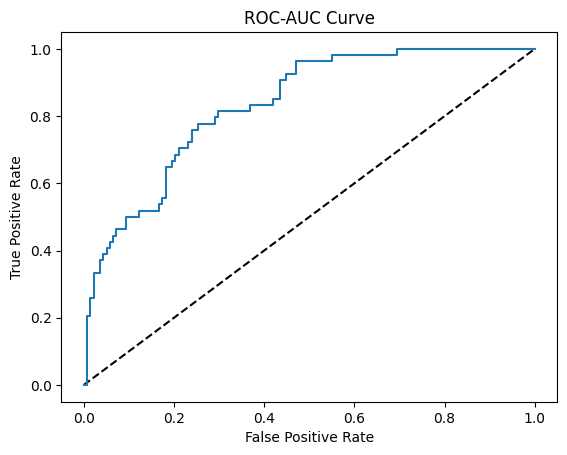

In [47]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='ROC-AUC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.show()

In [50]:
roc_auc_score(Y_test,Y_pred_prob)

0.8329307568438004

## **Explanation**

**Therefore the Accuracy and Precision Score is greater in Class Zero indicating there are more Non-Diabetic patients**